# Deep Networks

## Introduction

The previous two labs have given you quite some insight on how neural networks work. In this lecture, you'll learn why deeper networks sometimes lead to better results, and we'll generalize what you have learned before to get your matrix dimensions right in deep networks.


## Objectives

You will be able to:

* Give intuitive justifications for using multilayer neural network designs
* Explain the terms $dZ, dW, db$ and $da$ in the creation of a neural network

## Why deep representations?

Deep representation are really good at automating what used to be a tedious process of feature engineering. Not only would modelers need to have complex programming and analytical skills, they would also often require domain knowledge in order to manually build features that would then be passed on to a regression or classification algorithm. With deep representations, this time consuming process is often severly diminished. 

For example, the deep layers of a neural network for computer might look like this:

- first layer detects edges in pictures
- second layer groups edges together and starts to detect different parts
- more layers: group even bigger parts together, etc.


or in the case of audio:

- first layer: low lever wave features
- second layer: basic units of sounds, "phonemes" 
- third: word recognition
- fourth: sentence recognition
-...

The general idea is shallow networks detect "simple" things, and the deeper you go, the more comples things can be detected. 

You can build a smaller but deeper neural network that needs exponentially less hidden units but performs better, because learning happens in each layer!

## 2. Deep Network Architecture and Notation


Let's try to generalize all the notation to get things straight and know the dimensions of all matrices we'll be working with. Let's have a look at this 3-layer network:

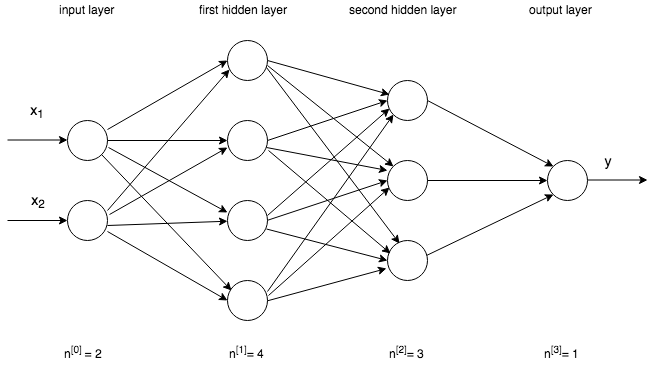

In [1]:
from IPython.display import display, Image
display(Image(filename='figures/Deeper_network_day2.png'))

Imagine that there are 300 cases, or observations (m = 300). What do our matrices look like? 

Let's start with $ Z^{[1]} = W^{[1]} X +b^{[1]}$.  

While not shown above in the diagram, Z is the output of the linear part of one of our hidden layers.  


Breaking this down, we have:

- $W^{[1]}$ is the weights matrix with dimensions (4 x 2)
- If we look at all our samples, $x$ is a (2 x 300)-matrix.
- $Z^{[1]}$ is a (4 x 300)-matrix.
- $b^{[1]}$ is a (4 x 1)-matrix. Due to broadcasting in python, this matrix will become duplicated into a (4 x 300)-matrix.

Similarly, the second hidden layer also has a linear function attached.

In $ Z^{[2]} = W^{[2]} A^{[1]} +b^{[2]}$

- The dimension of $A^{[1]}$ is the same as the dimension of $Z^{[1]}$: (4 x 300)
- $W^{[2]}$ is the weights matrix with dimensions (3 x 4)
- $Z^{[2]}$ is a (3 x 300)-matrices.
- $b^{[2]}$ is a (3 x 1)-matrix. Due to broadcasting in python, this matrix will become duplicated into a (3 x 300)-matrix.


## Generalizing Notation

From here, we wish to generalize our notation to a deep network with $L$ layers as opposed to 2. For each of these layers, we have parameters associated with the linear transformation of the layer, and parameters associated with the activation function applied to the output of this linear transformation.

** Parameters for the linear transformation: **  

$W^{[l]}: (n^{[l]}, n^{[l-1]})$

$b^{[l]}: (n^{[l]}, 1)$

$dW^{[l]}: (n^{[l]}, n^{[l-1]})$

$db^{[l]}: (n^{[l]}, 1)$

** Parameters for the activation function**  

$ a^{[l]}, z^{[l]}: (n^{[l]}, 1)$

$ Z^{[l]}, A^{[l]}: (n^{[l]}, m)$

$ dZ^{[l]}, dA^{[l]}: (n^{[l]}, m)$


## Forward propagation

Recall that deep networks work by performing forward propagation; evaluating a cost function associated with the output of the neural network by successively calculating the output of each layer given initial parameter values, and passing this output on to the next layer until a finalized output has been calculated and the cost function can then be evaluated.

- Input is $a^{[l-1]}$
- Output $a^{[l]}$, save $z^{[l]}, w^{[l]}, b^{[l]}, a^{[l-1]} $

Here's some more details about how the forward propogation calculation is performed:  

$Z^1$ is the output of the linear transformation of the initial input $A^1$ (the observations). In successive layers, $A^l$ is the output from the previous hidden layer. In all of these cases, $W^l$ is a matrix of weights to be optimized minimize the cost function. $b^l$ is also optimized but is a vector as opposed to a matrix.  

$g^l$ is the activation function which takes the output of this linear transformation and yields the input to the next hidden layer.  

Mathematically we have:

$ Z^{[l]}= W^{[l]} A^{[l-1]} + b^{[l]}$

$ A^{[l]}= g^{[l]} ( Z^{[l]})$

here, $ Z^{[l]}, A^{[l]}$ both have a shape of $(n^{[l]}, m)$

## Backward Propagation

Once an output for the neural network given the current parameter weights has been calculated, we must back propogate to calculate the gradients of layer parameters with respect to the cost function. This will allow us to apply an optimization algorithm such as gradient descent in order to make small adjustments to the parameters in order to minimize our cost (and improve our predictions).


- Input $da ^{[l]}$
- Output $da^{[l-1]}$, $dW^{[l]}, db^{[l]}$

In terms of formula's, the gradients for our respective parameters in each activiation layer are given by:

$ dZ^{[l]}= dA ^{[l]} * g^{[l]'} (Z^{[l]})$

$ dW^{[l]} = \dfrac{1}{m} dZ^{[l]}* A^{[l-1]T}$

$ db^{[l]} = \dfrac{1}{m} np.sum(dZ^{[l]}, axis=1, keepdims=True)$

$ dA^{[l-1]} = W^{[l]T}*dZ^{[l]}$


## Process Overview

To summarize the process once more, we begin by defining a model architecture which includes the number of hidden layers, activation functions (sigmoid or relu) and the number of units in each of these.   

We then initialize parameters for each of these layers (typically randomly). After the initial parameters are set, forward propagation evaluates the model giving a prediction, which is then used to evaluate a cost function. Forward propogation involves evaluating each layer and then piping this output into the next layer. 

Each layer consists of a linear transformation and an activation function.  The parameters for the linear transformation in **each** layer include $W^l$ and $b^l$. The output of this linear transformation is represented by $Z^l$. This is then fed through the activation function (again, for each layer) giving us an output $A^l$ which is the input for the next layer of the model.  

After forward propogation is completed and the cost function is evaluated, backpropogation is used to calculate gradients of the initial parameters with respect to this cost function. Finally, these gradients are then used in an optimization algorithm, such as gradient descent, to make small adjustments to the parameters and the entire process of forward propogation, back propogation and parameter adjustments is repeated until the modeller is satisfied with the results.

## Additional Resources

https://www.coursera.org/learn/neural-networks-deep-learning/lecture/rz9xJ/why-deep-representations

## Summary

In this brief lesson, we gave an intuitive justification behind using deep network structures and reviewed the architecture for neural nets in general. In upcoming lessons, we will begin to extend our previous work in creating a single layer neural network in order to build a deeper more powerful model.